In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy import signal
import time
import math

In [19]:
def generate_linear_constant_velocity(v,init_xpos,init_ypos,width,height,fps):
    num_frames=math.ceil(((width-init_xpos)/v)*fps)
    new_xpos=init_xpos
    
    fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
    out = cv2.VideoWriter('test.avi',fourcc, fps, (width, height))
    for i in range(num_frames):
        A1=np.zeros((height,width,3)).astype(np.uint8)
        new_xpos+=(v/fps)
        
        cv2.circle(A1, (int(new_xpos),init_ypos), 3, (255,0,0), 1)
        out.write(A1)
        
    out.release()
    

In [98]:
def generate_linear_constant_acceleration(A,v_init,init_xpos,init_ypos,width,height,fps):
    a=0.5*A
    b=v_init
    c=-(width-init_xpos)
    total_t=(-b+np.sqrt(b**2-4*a*c))/(2*a)
    print(total_t)
    num_frames=math.ceil(total_t*fps)
    new_xpos=init_xpos
    
    fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
    out = cv2.VideoWriter('test1.avi',fourcc, fps, (width, height))
    for i in range(num_frames):
        A1=np.zeros((height,width,3)).astype(np.uint8)
        v_init+= A*1/fps
        new_xpos+=v_init*(1/fps) +0.5*A*(1/fps)**2 + np.random.randint(low=-10, high=10, size=1)
        init_ypos +=  np.random.randint(low=-10, high=10, size=1)
        print(init_ypos)
        cv2.circle(A1, (int(new_xpos),int(init_ypos)), 30, (255,255,0), 10)
        cv2.rectangle(A1,(int(new_xpos)-50,int(init_ypos)-50),(int(new_xpos)+50,int(init_ypos)+50),(0,255,0),3)
        cv2.ellipse(A1,(int(new_xpos),int(init_ypos)),(100,50),0,120,170,(255,120,80),10)
        cv2.cvtColor(A1, cv2.COLOR_RGB2BGR)
        out.write(A1)
        
    out.release()
    return A1
    

In [137]:
def Toss_Ball(A,v_init,init_xpos,init_ypos,width,height,fps,playtime):
    a=0.5*A
    b=v_init
    c=-(width-init_xpos)
    
    #total_t=(-b+np.sqrt(b**2-4*a*c))/(2*a)
    #print(total_t)
    num_frames=math.ceil(playtime*fps)
    new_xpos=init_xpos
    new_ypos=init_ypos
    fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
    out = cv2.VideoWriter('test1.avi',fourcc, fps, (width, height))
    for i in range(num_frames):
        A1=np.zeros((height,width,3)).astype(np.uint8)
        v_init+= A*1/fps
        #print(v_init)
        new_ypos -=  v_init*(1/fps) +0.5*A*(1/fps)**2 
        #print(new_ypos)
        cv2.circle(A1, (int(init_xpos),int(new_ypos)), 30, (255,255,0), 10)
        #cv2.rectangle(A1,(int(new_xpos)-50,int(init_ypos)-50),(int(new_xpos)+50,int(init_ypos)+50),(0,255,0),3)
        #cv2.ellipse(A1,(int(new_xpos),int(init_ypos)),(100,50),0,120,170,(255,120,80),10)
        #cv2.cvtColor(A1, cv2.COLOR_RGB2BGR)
        out.write(A1)
        if new_ypos  > init_ypos:
            break
        
    out.release()
    return A1

In [141]:
def trajectory(A,v_init,theta,init_xpos,init_ypos,width,height,fps,playtime):
    vx_init = v_init * np.cos(np.pi*theta/180)
    vy_init = v_init * np.sin(np.pi*theta/180)
    a=0.5*A
    b=vy_init
    c=-(width-init_xpos)
    
    #total_t=(-b+np.sqrt(b**2-4*a*c))/(2*a)
    #print(total_t)
    num_frames=math.ceil(playtime*fps)
    new_xpos=init_xpos
    new_ypos=init_ypos
    fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
    out = cv2.VideoWriter('test2.avi',fourcc, fps, (width, height))
    for i in range(num_frames):
        A1=np.zeros((height,width,3)).astype(np.uint8)
        
        vy_init+= A*1/fps
        #print(v_init)
        
        new_xpos+=(vx_init/fps)
        new_ypos -=  vy_init*(1/fps) +0.5*A*(1/fps)**2 
        #print(new_ypos)
        cv2.circle(A1, (int(new_xpos),int(new_ypos)), 30, (255,255,0), 10)
        #cv2.rectangle(A1,(int(new_xpos)-50,int(init_ypos)-50),(int(new_xpos)+50,int(init_ypos)+50),(0,255,0),3)
        #cv2.ellipse(A1,(int(new_xpos),int(init_ypos)),(100,50),0,120,170,(255,120,80),10)
        #cv2.cvtColor(A1, cv2.COLOR_RGB2BGR)
        out.write(A1)
        if new_ypos  > init_ypos or new_xpos > width:
            break
        
    out.release()
    return A1

In [151]:
def combine(Acc,v_init,theta,init_xpos,init_ypos,width,height,fps,playtime,Acc1,v_init1,theta1,init_xpos1,init_ypos1):
    vx_init = v_init * np.cos(np.pi*theta/180)
    vy_init = v_init * np.sin(np.pi*theta/180)
    a=0.5*Acc
    b=vy_init
    c=-(width-init_xpos)
    
    vx_init1 = v_init1 * np.cos(np.pi*theta1/180)
    vy_init1 = v_init1 * np.sin(np.pi*theta1/180)
    a1=0.5*Acc1
    b1=vy_init1
    c1=-(width-init_xpos1)
    
    #total_t=(-b+np.sqrt(b**2-4*a*c))/(2*a)
    #print(total_t)
    num_frames=math.ceil(playtime*fps)
    new_xpos=init_xpos
    new_ypos=init_ypos
    new_xpos1=init_xpos1
    new_ypos1=init_ypos1
    fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
    out = cv2.VideoWriter('test2.avi',fourcc, fps, (width, height))
    for i in range(num_frames):
        A1=np.zeros((height,width,3)).astype(np.uint8)
        
        vy_init+= Acc*1/fps
        #print(v_init)
        
        new_xpos+=(vx_init/fps)
        new_ypos -=  vy_init*(1/fps) +0.5*Acc*(1/fps)**2 
        #print(new_ypos)
        cv2.circle(A1, (int(new_xpos),int(new_ypos)), 30, (255,255,0), 10)
        #cv2.rectangle(A1,(int(new_xpos)-50,int(init_ypos)-50),(int(new_xpos)+50,int(init_ypos)+50),(0,255,0),3)
        #cv2.ellipse(A1,(int(new_xpos),int(init_ypos)),(100,50),0,120,170,(255,120,80),10)
        #cv2.cvtColor(A1, cv2.COLOR_RGB2BGR)
        vy_init1+= Acc1*1/fps
        #print(v_init)
        
        new_xpos1 +=(vx_init1/fps)
        new_ypos1 -=  vy_init1*(1/fps) +0.5*Acc1*(1/fps)**2 
        cv2.circle(A1, (int(new_xpos1),int(new_ypos1)), 30, (255,255,0), 10)
        
        
                
        out.write(A1)
        if new_ypos  > init_ypos or new_xpos > width:
            break
        
    out.release()
    return A1

In [152]:
,Acc1,v_init1,theta1,init_xpos1,init_ypos1):

SyntaxError: unmatched ')' (<ipython-input-152-2ffe31f8e76b>, line 1)

In [150]:
combine(-98,600,60,0,2000,4000,2000,30,300,-10,-300,-15,3500,1700)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [136]:
A1=Toss_Ball(-98,600,500,2000,1000,2000,30,300)

596.7333333333333
593.4666666666667
590.2
586.9333333333334
583.6666666666667
580.4000000000001
577.1333333333334
573.8666666666668
570.6000000000001
567.3333333333335
564.0666666666668
560.8000000000002
557.5333333333335
554.2666666666669
551.0000000000002
547.7333333333336
544.4666666666669
541.2000000000003
537.9333333333336
534.666666666667
531.4000000000003
528.1333333333337
524.866666666667
521.6000000000004
518.3333333333337
515.0666666666671
511.8000000000004
508.53333333333376
505.2666666666671
502.00000000000045
498.7333333333338
495.46666666666715
492.2000000000005
488.93333333333385
485.6666666666672
482.40000000000055
479.1333333333339
475.86666666666724
472.6000000000006
469.33333333333394
466.0666666666673
462.80000000000064
459.533333333334
456.26666666666733
453.0000000000007
449.73333333333403
446.4666666666674
443.2000000000007
439.9333333333341
436.6666666666674
433.4000000000008
430.1333333333341
426.86666666666747
423.6000000000008
420.33333333333417
417.066666666

In [99]:
A1=generate_linear_constant_acceleration(1000,10,20,500,1000,1000,30)

1.3900357138301864
[501]
[501]
[491]
[487]
[488]
[493]
[497]
[504]
[498]
[496]
[500]
[493]
[494]
[487]
[487]
[479]
[481]
[486]
[477]
[467]
[467]
[474]
[476]
[477]
[469]
[468]
[465]
[456]
[446]
[436]
[426]
[428]
[433]
[437]
[429]
[431]
[426]
[433]
[435]
[443]
[443]
[438]


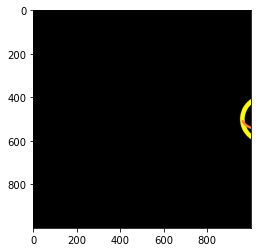

In [77]:
plt.imshow(A1)

In [15]:
generate_linear_constant_velocity(15,10,30,200,200,30)

In [140]:
np.sin(30*np.pi/180)

0.49999999999999994

In [129]:
import numpy as np
import cv2

# initialize water image
height = 500
width = 700
water_depth = np.zeros((height, width), dtype=float)

# initialize video writer
fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
fps = 30
video_filename = 'output.avi'
out = cv2.VideoWriter(video_filename, fourcc, fps, (width, height))

# new frame after each addition of water
for i in range(3):
    random_locations = np.random.random_integers(200,450, size=(200, 2))
    for item in random_locations:
        water_depth[item[0], item[1]] += 0.1
        #add this array to the video
        gray = cv2.normalize(water_depth, None, 255, 0, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
        gray_3c = cv2.merge([gray, gray, gray])
        out.write(gray_3c)

# close out the video writer
out.release()

<ipython-input-129-bca0fbb6c1bf>:17: DeprecationWarning: This function is deprecated. Please call randint(200, 450 + 1) instead
  random_locations = np.random.random_integers(200,450, size=(200, 2))


<VideoWriter 0x7fd988025db0>

In [95]:
import cv2
import numpy as np
fourcc = cv2.VideoWriter_fourcc('M','P','E','G')
writer = cv2.VideoWriter('test1.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 25, (640, 480), False)
for i in range(100):
    x = np.random.randint(255, size=(480, 640)).astype('uint8')
    writer.write(x)